#### 1. Loading required Libraries

In [1]:
import numpy as np               # Linear Algebra
import pandas as pd              # Data Handling
import seaborn as sns            # Visualization
import matplotlib.pyplot as plt  # Visualization
from datetime import date        # Use Year
import warnings                  # For warnings
warnings.filterwarnings('ignore')

#### 2. Importing dataset into 'df' dataframe

In [2]:
df = pd.read_csv("../datasets/dataset.csv")
df = df.iloc[:,1:]
df.head()

,Category,SubCategory,ProductName,Description
0,Accessories,Bags,"""Prada Striped Shell Belt Bag""","""One of Prada's most functional designs, this belt bag is made from weather-resistant shell fabric with zip compartments for storing your daily belongings. It's designed for navigating your day hands-free- try styling yours diagonally across the body."""
1,Accessories,Socks,"""Falke - Lhasa Wool And Cashmere-blend Socks - Mens - Navy""","""Falke - Casual yet luxurious, Falke's dark navy Lhasa socks are woven from a mid-weight wool and cashmere-blend that's naturally insulating. They have a soft rib for comfort and reinforced stress zones for durability. Wear them to round off endless looks."""
2,Suits,Tuxedos,"""peak lapel tuxedo suit jacket""","""White and black linen blend peak lapel tuxedo suit jacket from Tagliatore featuring a two tone design, peaked lapels, long sleeves, a button fastening, front pockets and a curved hemline. """
3,Accessories,Gloves,"""Thom Browne Navy 4-Bar Rib Gloves""","""Pair of rib knit cashmere gloves in navy. Signature stripes in off-white and signature tricolor grosgrain flag at cuffs. Supplier color: NavySupplier textile: Cashmere"""
4,Accessories,Cufflinks,"""Alice Made This - Bayley Round Patina-brass Cufflinks - Mens - Blue""","""Alice Made This - Made in the UK, these teal Bayley cufflinks from Alice Made This are designed to reflect traditional British engineering. Crafted from gold-tone solid brass, they are characterised with layers of patina hand-applied by London-based artist Derek Bayley for a sleek, refined finish."""


#### 3. Description of Dataset

##### 3.1 Shape of Dataset

In [3]:
shape = df.shape
print(f"There are \033[1m {shape[0]} rows\patterns \033[0m and \033[1m{shape[1]} features\033[0m.")

There are  5000 rows\patterns  and 4 features.


##### 3.2 info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     4963 non-null   object
 1   SubCategory  4963 non-null   object
 2   ProductName  5000 non-null   object
 3   Description  5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


##### 3.3 Missing Values for features

In [5]:
[[features,df[features].isnull().sum()] for features in df.columns if df[features].isnull().sum()>0]

[['Category', 37], ['SubCategory', 37]]

##### 3.4 Heat Map for Missing Values

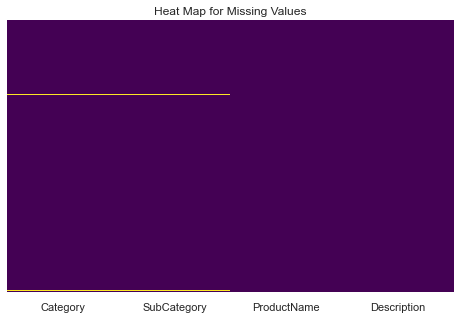

In [6]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

##### 3.5 Dropping NA values

In [7]:
df.dropna(inplace=True)

#### 4. Exploratory Data Analysis

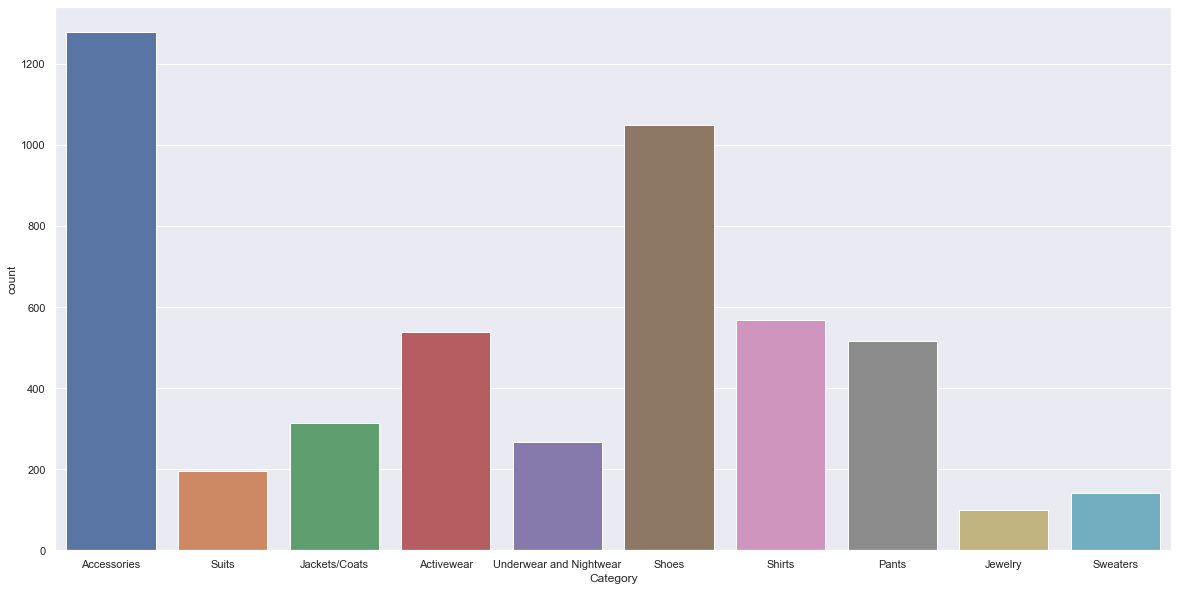

In [8]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.figure(figsize=(20,10))
sns.countplot(x=df['Category'])
plt.show()

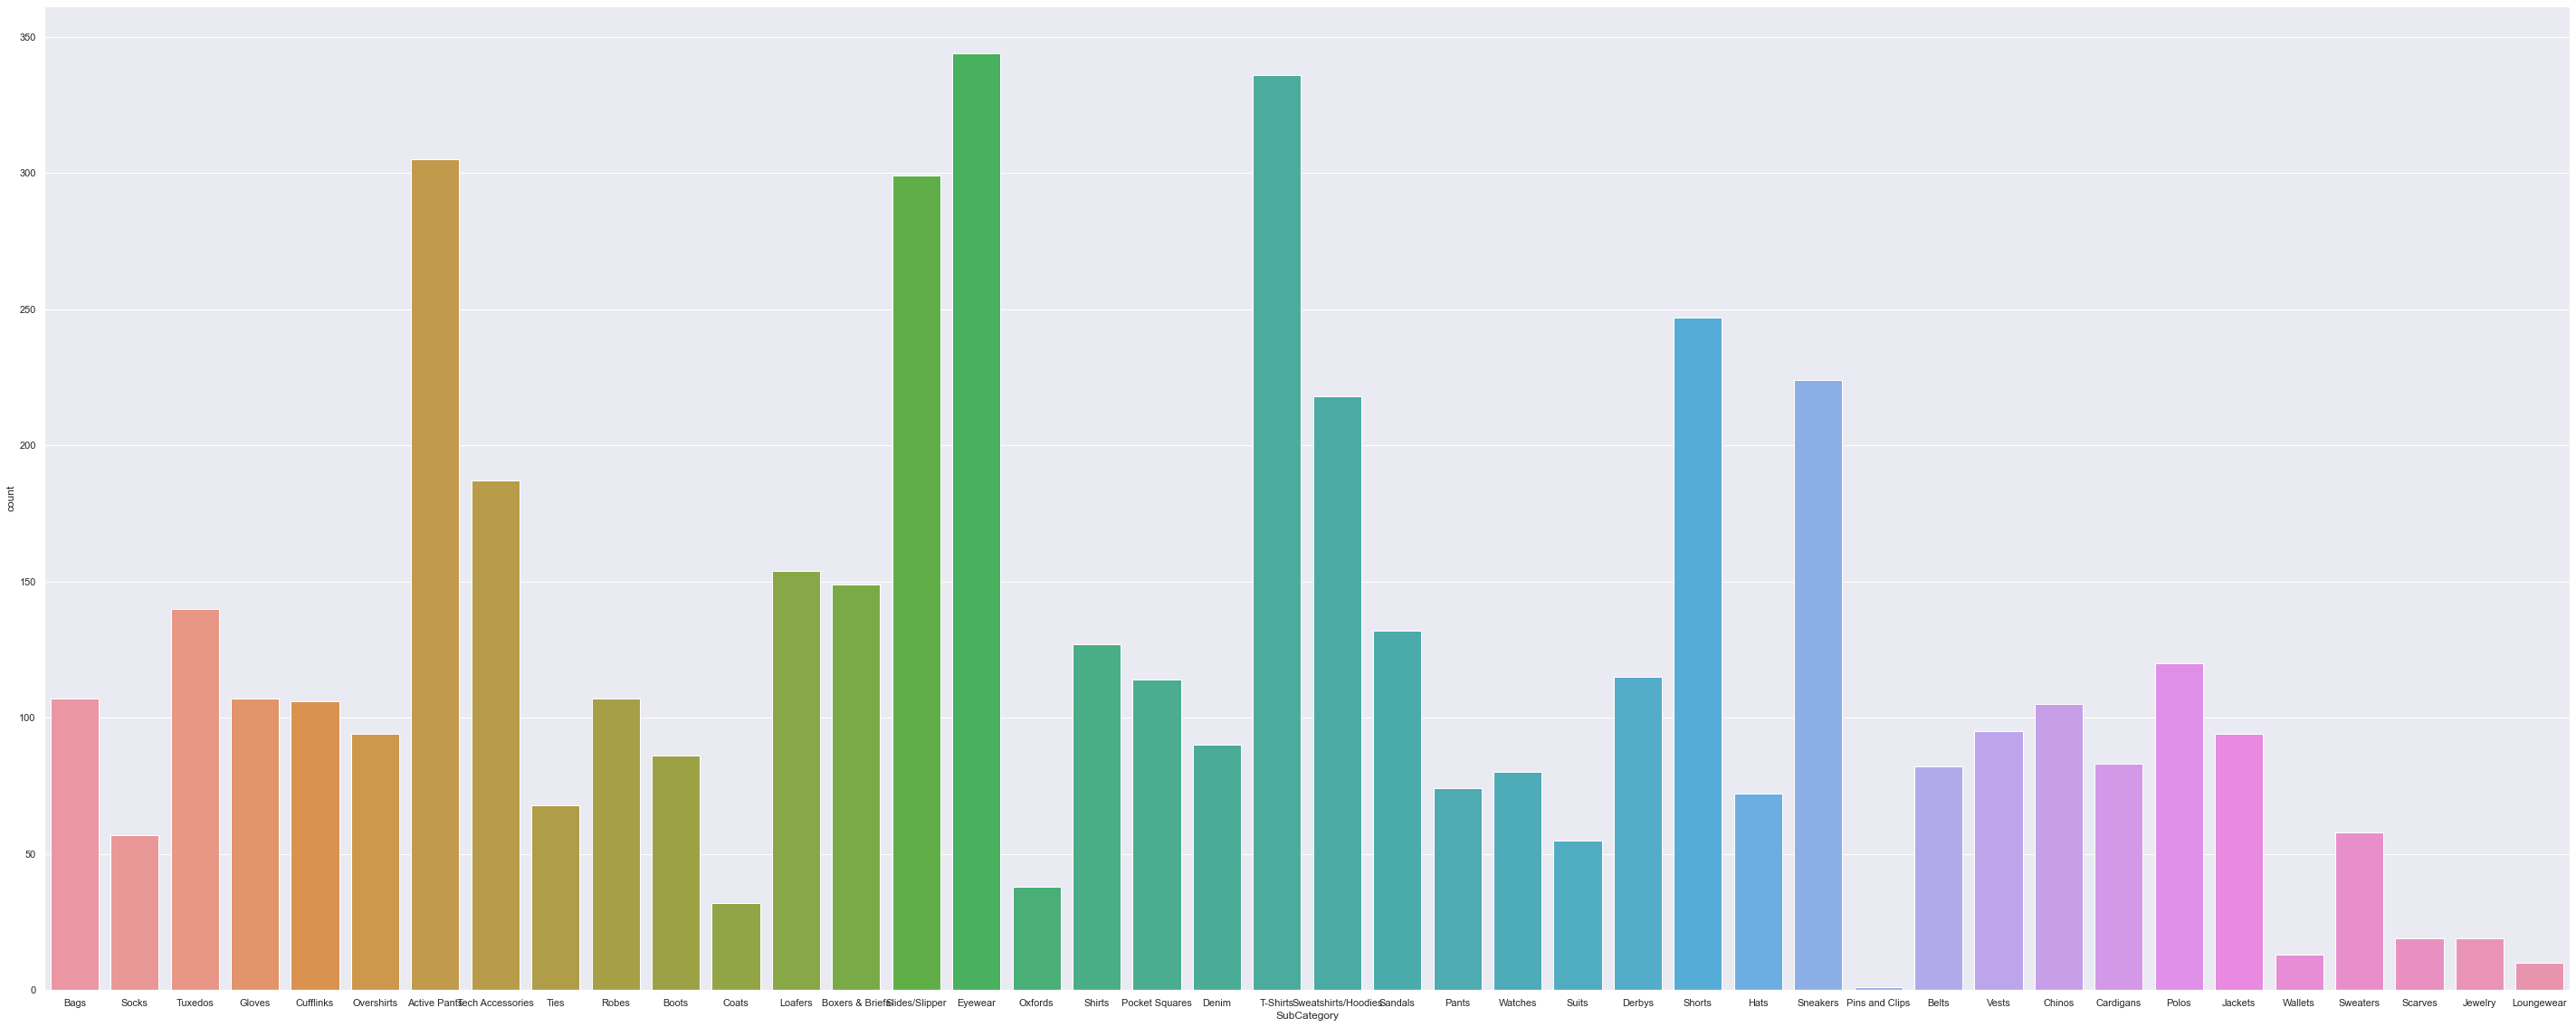

In [9]:
plt.figure(figsize=(50,20))
sns.countplot(x=df['SubCategory'])
plt.show()

#### 5. Text Preprocessing

In [10]:
df.drop(['SubCategory'],axis=1,inplace=True)

In [11]:
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
A Sreatlit WebApp that can predict Product Category by providing Procut Name and Product Description.
1. Text Preprocessing-
    a. Stopwords Removal
    b. Stemmer
    c. Lemmatizition

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
def pre(q):
    stpwrd = nltk.corpus.stopwords.words('english')
    
    STOP_WORDS =stopwords.words("english")
    q =re.sub(r'[^A-Za-z]', " ",str(q))
    q =q.lower().split()
    clean =[]
    for word in q:
        if word not in stpwrd:
            clean.append(word)
    tx =WordNetLemmatizer()
    root =[ ]
    for word in clean:
        word = tx.lemmatize(word)
        root.append(word)
    return " ".join(root)

In [14]:
df['Description']=df['Description'].apply(pre)
df['ProductName']=df['ProductName'].apply(pre)

#### 6. Pipeline

In [15]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [16]:
X=df.drop('Category',axis=1)
y= df['Category']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
vectorizer1 = TfidfVectorizer(use_idf=True,
    ngram_range=(1,2),
    sublinear_tf=False,
    max_df=0.5,
    min_df=5)

In [19]:
tfidf_transformer = ColumnTransformer(
    transformers= [
        ("tfidf_1", vectorizer1, "Description"),
        ("tfidf_2", vectorizer1, "ProductName")
        ]
    )
 
Rfc = Pipeline(
    steps=[
        ("prep", tfidf_transformer), 
        ("model", RandomForestClassifier(n_estimators = 100, random_state = 0))])

Rfc.fit(X_train, y_train)
y_pred = Rfc.predict(X_test)

#### 7. Evaluation

In [20]:
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)
print(f"Accuracy: {accuracy*100} %\n")

Accuracy: 94.69999999999999 %



In [21]:
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Classification Report: 
                          precision    recall  f1-score   support

            Accessories       0.95      0.99      0.97       407
             Activewear       0.91      0.87      0.89       178
          Jackets/Coats       0.95      0.91      0.93        91
                Jewelry       1.00      0.76      0.86        41
                  Pants       0.93      0.92      0.92       192
                 Shirts       0.92      0.97      0.95       197
                  Shoes       0.98      1.00      0.99       339
                  Suits       0.98      0.92      0.95        60
               Sweaters       0.95      0.82      0.88        50
Underwear and Nightwear       0.95      0.94      0.95        83

               accuracy                           0.95      1638
              macro avg       0.95      0.91      0.93      1638
           weighted avg       0.95      0.95      0.95      1638



#### 8. Dumping into pickle

In [22]:
import pickle

data = {"rfc": Rfc}

pickle.dump(data,open('../pickle/model.pkl','wb'))